# Resnet-50

## Loading Libraries

In [1]:

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.applications import ResNet50

from tensorflow.keras.preprocessing.image import ImageDataGenerator



## Loading the dataset Images

In [5]:
train_dir="../input/chest-xray-covid19-pneumonia/Data/train"
test_dir="../input/chest-xray-covid19-pneumonia/Data/test"

TRAIN_COVID_PATH = "../input/chest-xray-covid19-pneumonia/Data/train/COVID19"
TRAIN_NORMAL_PATH = "../input/chest-xray-covid19-pneumonia/Data/train/NORMAL"
TRAIN_PNE_PATH = "../input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA"


VAL_NORMAL_PATH = "../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"
VAL_PNEU_PATH = "../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"
VAL_COVID_PATH = "../input/chest-xray-covid19-pneumonia/Data/test/COVID19"

## Image Augmentation

In [8]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [9]:


train_generator = generator.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 5144 images belonging to 3 classes.


In [10]:


train_generator.class_indices



{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [11]:


validation_generator = generator.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')



Found 1288 images belonging to 3 classes.


## Applying RESNET-50 Model

In [13]:
epochs = 100
stepsperepoch=9
validationsteps=1
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("own.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)



In [14]:
input_t = Input(shape=(224, 224, 3))

In [20]:
model = ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

In [21]:


model.summary()



Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [22]:

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:


hist = model.fit_generator(
    train_generator,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data=validation_generator,
    validation_steps = validationsteps
)



Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 1.0582 - accuracy: 0.6146
Epoch 00001: val_loss did not improve from 0.88778
9/9 [==============================] - 15s 2s/step - loss: 1.0582 - accuracy: 0.6146 - val_loss: 1.4505 - val_accuracy: 0.5938
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.9136 - accuracy: 0.6528
Epoch 00002: val_loss did not improve from 0.88778
9/9 [==============================] - 14s 2s/step - loss: 0.9136 - accuracy: 0.6528 - val_loss: 1.7093 - val_accuracy: 0.7500
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.9275 - accuracy: 0.6840
Epoch 00003: val_loss improved from 0.88778 to 0.76584, saving model to own.h5
9/9 [==============================] - 15s 2s/step - loss: 0.9275 - accuracy: 0.6840 - val_loss: 0.7658 - val_accuracy: 0.7188
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.7644 - accuracy: 0.7083
Epoch 00004: val_loss did not improve from 0.76584
9/9 [==========

Epoch 31/100
9/9 [==============================] - ETA: 0s - loss: 0.2717 - accuracy: 0.8854
Epoch 00031: val_loss did not improve from 0.76584
9/9 [==============================] - 13s 1s/step - loss: 0.2717 - accuracy: 0.8854 - val_loss: 1.6430 - val_accuracy: 0.7188
Epoch 32/100
9/9 [==============================] - ETA: 0s - loss: 0.2767 - accuracy: 0.8819
Epoch 00032: val_loss did not improve from 0.76584
9/9 [==============================] - 12s 1s/step - loss: 0.2767 - accuracy: 0.8819 - val_loss: 2.3879 - val_accuracy: 0.6562
Epoch 33/100
9/9 [==============================] - ETA: 0s - loss: 0.2451 - accuracy: 0.9214
Epoch 00033: val_loss did not improve from 0.76584
9/9 [==============================] - 11s 1s/step - loss: 0.2451 - accuracy: 0.9214 - val_loss: 2.1575 - val_accuracy: 0.7188
Epoch 34/100
9/9 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.9062
Epoch 00034: val_loss did not improve from 0.76584
9/9 [==============================] - 

Epoch 61/100
9/9 [==============================] - ETA: 0s - loss: 0.2314 - accuracy: 0.9271
Epoch 00061: val_loss did not improve from 0.54041
9/9 [==============================] - 11s 1s/step - loss: 0.2314 - accuracy: 0.9271 - val_loss: 0.6418 - val_accuracy: 0.7812
Epoch 62/100
9/9 [==============================] - ETA: 0s - loss: 0.1302 - accuracy: 0.9514
Epoch 00062: val_loss improved from 0.54041 to 0.50889, saving model to own.h5
9/9 [==============================] - 11s 1s/step - loss: 0.1302 - accuracy: 0.9514 - val_loss: 0.5089 - val_accuracy: 0.8125
Epoch 63/100
9/9 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9479
Epoch 00063: val_loss did not improve from 0.50889
9/9 [==============================] - 11s 1s/step - loss: 0.1412 - accuracy: 0.9479 - val_loss: 1.0132 - val_accuracy: 0.7188
Epoch 64/100
9/9 [==============================] - ETA: 0s - loss: 0.1445 - accuracy: 0.9549
Epoch 00064: val_loss did not improve from 0.50889
9/9 [======

Epoch 91/100
9/9 [==============================] - ETA: 0s - loss: 0.1241 - accuracy: 0.9722
Epoch 00091: val_loss did not improve from 0.02434
9/9 [==============================] - 11s 1s/step - loss: 0.1241 - accuracy: 0.9722 - val_loss: 0.0682 - val_accuracy: 0.9688
Epoch 92/100
9/9 [==============================] - ETA: 0s - loss: 0.1681 - accuracy: 0.9514
Epoch 00092: val_loss did not improve from 0.02434
9/9 [==============================] - 11s 1s/step - loss: 0.1681 - accuracy: 0.9514 - val_loss: 0.1295 - val_accuracy: 0.9688
Epoch 93/100
9/9 [==============================] - ETA: 0s - loss: 0.1621 - accuracy: 0.9410
Epoch 00093: val_loss did not improve from 0.02434
9/9 [==============================] - 11s 1s/step - loss: 0.1621 - accuracy: 0.9410 - val_loss: 0.1386 - val_accuracy: 0.9375
Epoch 94/100
9/9 [==============================] - ETA: 0s - loss: 0.2254 - accuracy: 0.9340
Epoch 00094: val_loss did not improve from 0.02434
9/9 [==============================] - 

## Finding Accuracy of the model

In [26]:
preds = model.evaluate(validation_generator)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

41/41 [==============================] - 38s 923ms/step - loss: 0.1388 - accuracy: 0.9480
Validation Loss = 0.13875791430473328
Validation Accuracy = 0.9479813575744629


## Accuracy : 95%

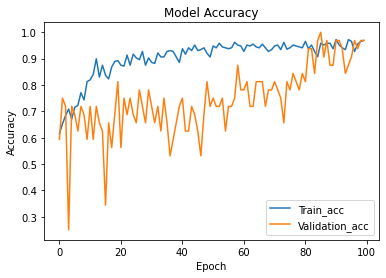

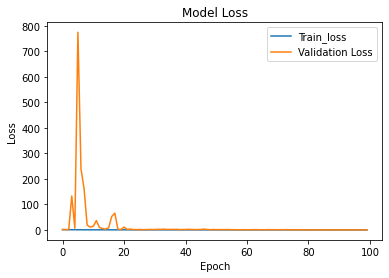

In [27]:


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

